# 2일차 과제 
목표변수 FAT를 예측하기 위한 파생변수(BMI 등)를 생성하여 회귀분석을 실시하고 결과를 해석하라

# 0. 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

# 1. 데이터 구성하기

In [75]:
df_raw=pd.read_csv("/home/pirl/Documents/실습화일/429/체질검사.csv",encoding="euc_kr")

df_raw["HEIGHT"]*=2.54/100
df_raw["WEIGHT"]*=0.45

df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,163.4175,1.83515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,75.6000,1.80975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,79.9875,1.73990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,66.4875,1.67005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,98.5500,1.62560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
5,24.2,40,91.0125,1.77800,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0
6,23.3,52,75.1500,1.72085,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9
7,26.0,54,103.5000,1.83515,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6
8,9.0,47,82.9125,1.89230,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8
9,4.0,47,57.3750,1.69545,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8


BMI = 몸무게(kg) ÷ (신장(m) × 신장(m))

In [76]:
X=[]
for i in range(0,252):
    X.append(i)
X
BMI=pd.DataFrame({'BMI':['0']},index=X)
pd.concat([df_raw,BMI],axis=1)


df_raw["BMI"] = df_raw["WEIGHT"]/(df_raw["HEIGHT"]**2)
df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,163.4175,1.83515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,75.6000,1.80975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,79.9875,1.73990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,66.4875,1.67005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,98.5500,1.62560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
5,24.2,40,91.0125,1.77800,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,28.789726
6,23.3,52,75.1500,1.72085,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9,25.377156
7,26.0,54,103.5000,1.83515,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6,30.732452
8,9.0,47,82.9125,1.89230,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8,23.154747
9,4.0,47,57.3750,1.69545,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8,19.959641


# 2. 변수간의 경향성 파악

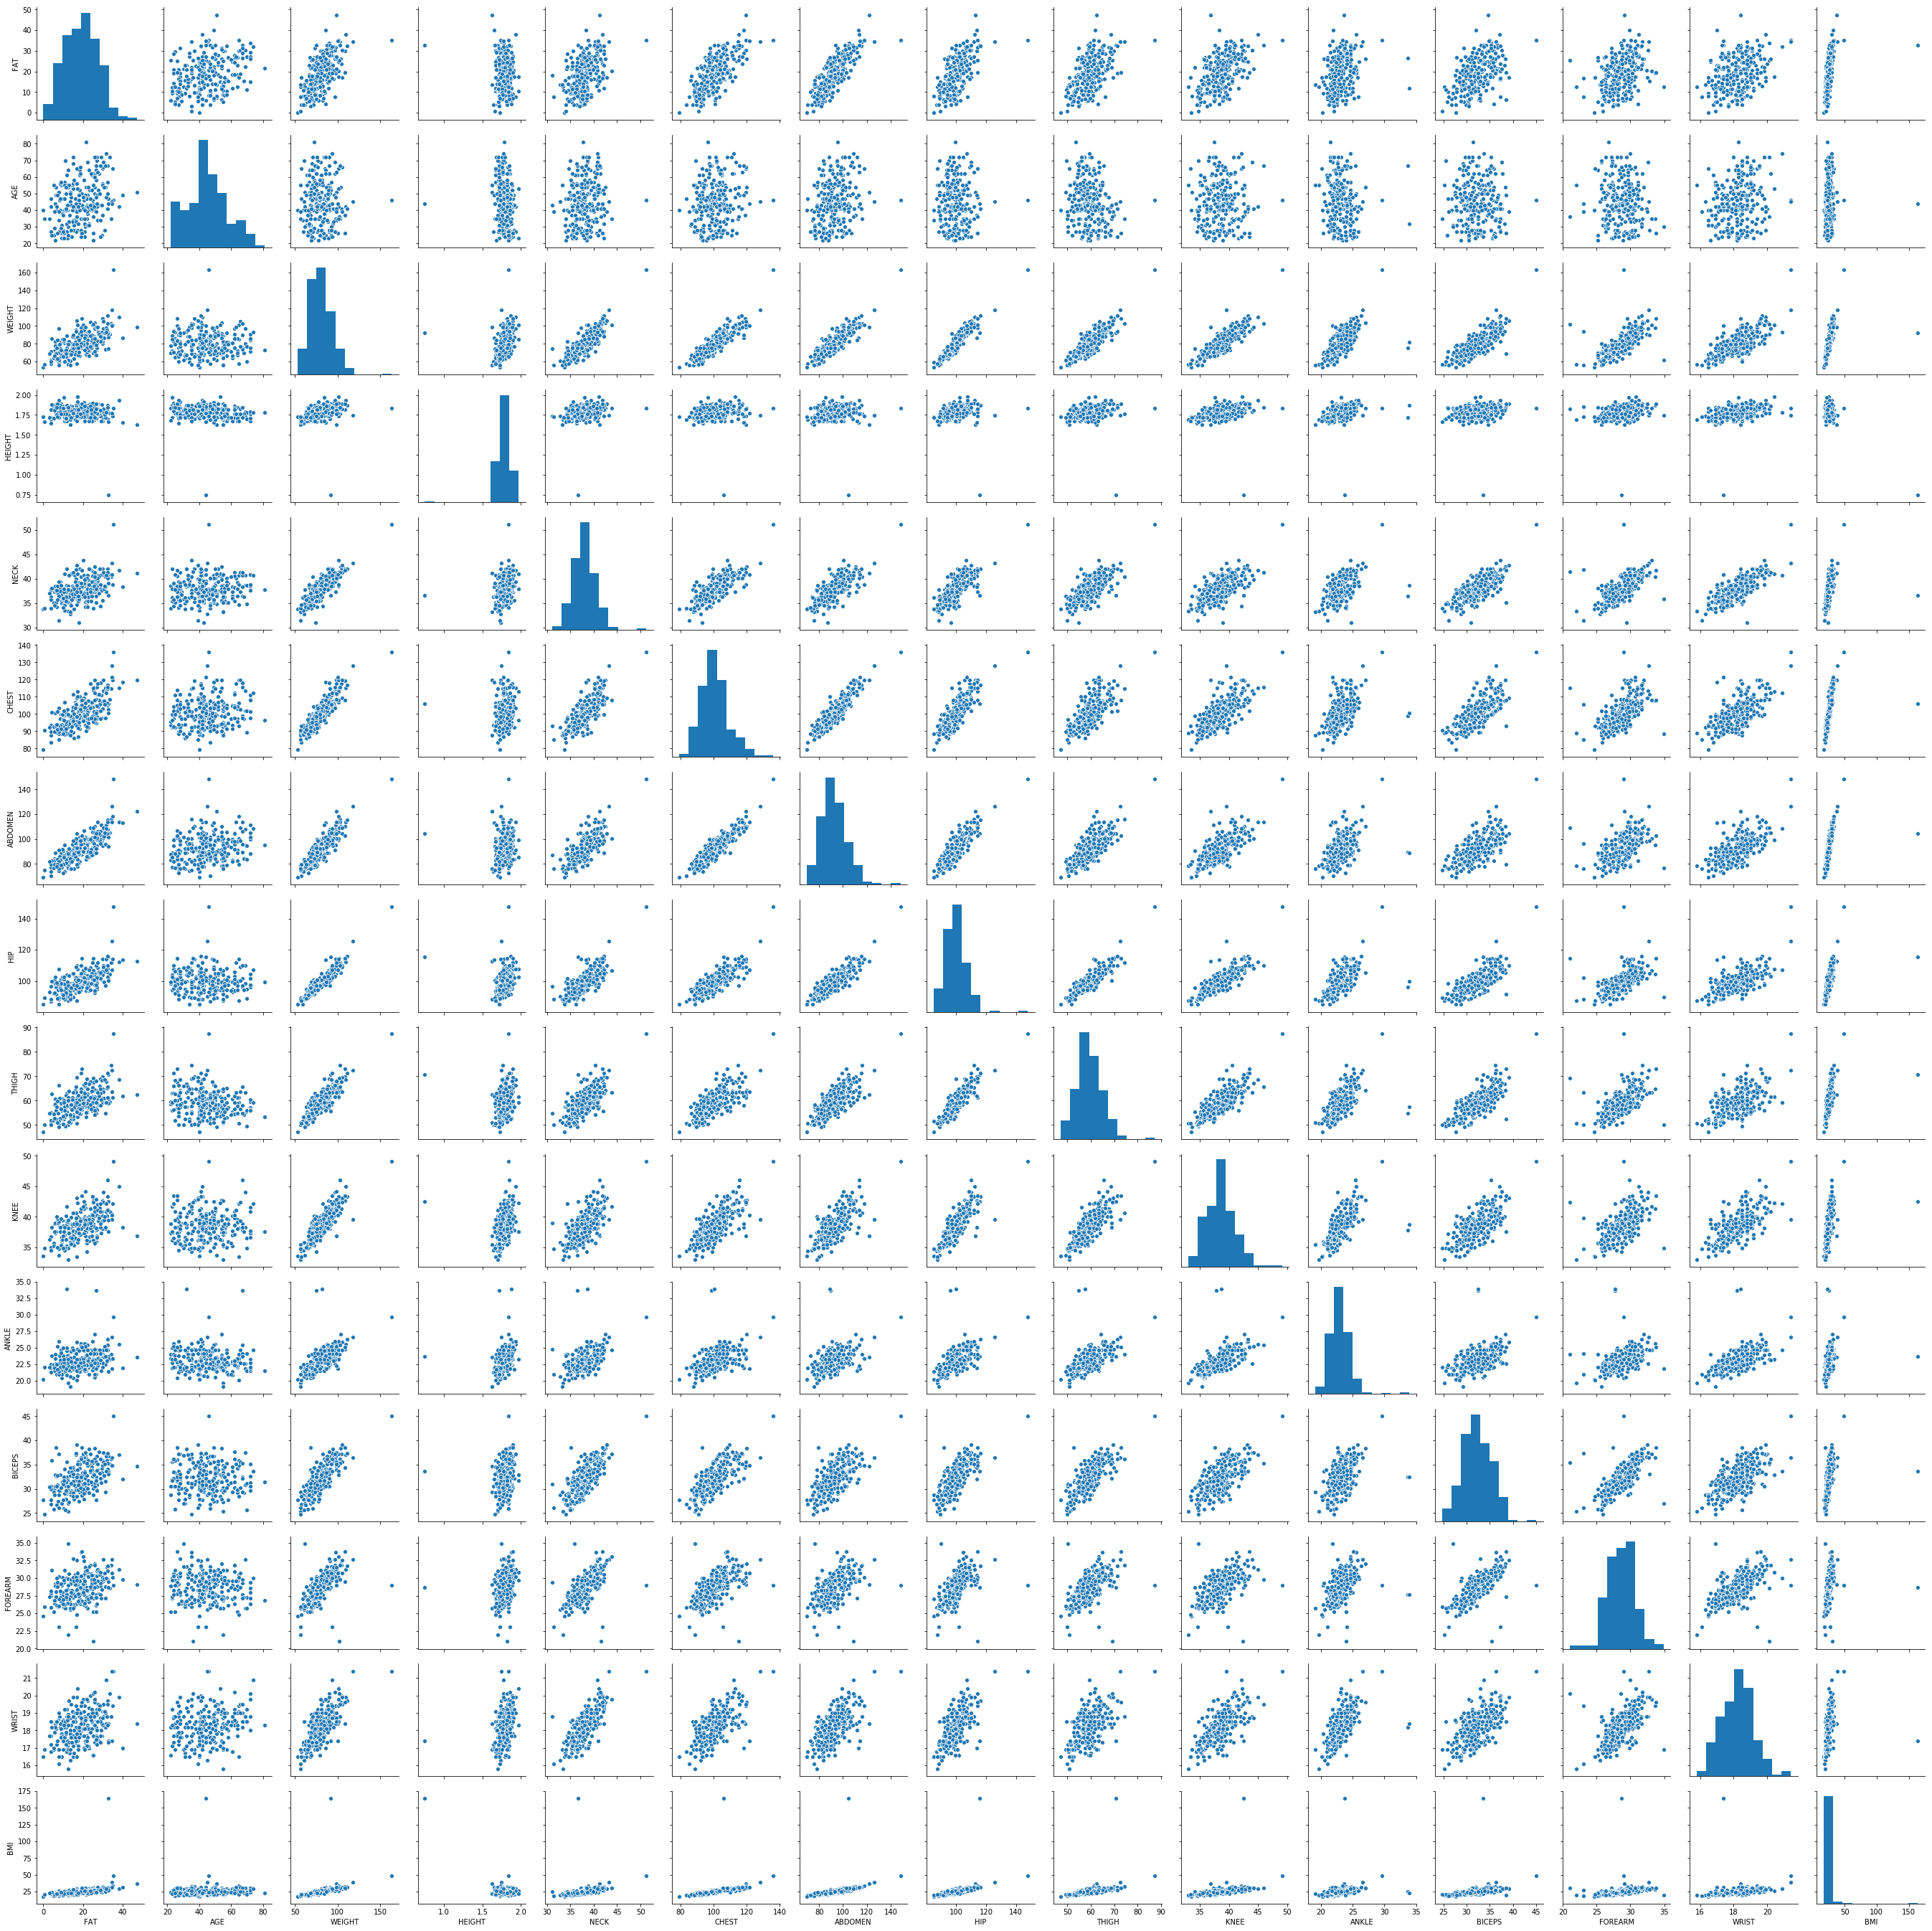

In [77]:
sns.pairplot(df_raw)

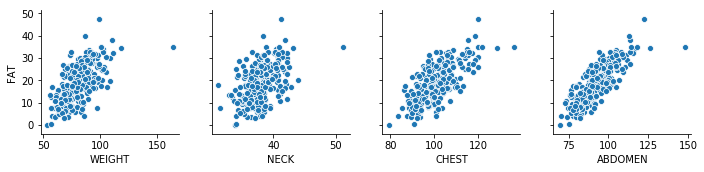

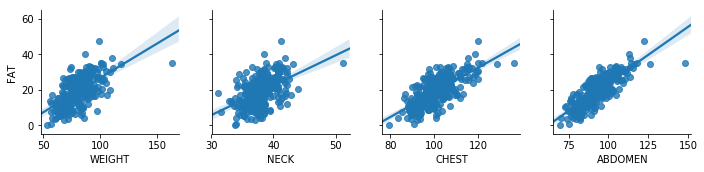

In [78]:
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"])
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"],kind="reg")

# 
체질 비만도(FAT)는 다수의 설명변수와 선형관계를 보이고 있고, 설명변수간 선형성과 이상치 확인됨
=> 다중공선성 확인, 이상치 처리 검토

In [79]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


FAT과 CHEST,ABDOMEN 간의 높은 선형관계 확인 /
설명변수 간 선형관계 : WEIGHT와 다른 설명변수 간의 선형관계 확인 => 다중공선성 확인, 조치 필요

# 3. 회귀 모델 생성

In [80]:
reg_model=smf.ols(formula="FAT~AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI",data=df_raw)

In [81]:
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           5.49e-63
Time:                        17:45:29   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

1. p값이 유의수준 0.05 보다 작으므로 회귀모델로서 유의
2. 설명력 : 0.749 (모델을 통하여 설명변수 EVAL을 74.9%를 설명할 수 있음)
3. 희귀계수 검정 => 절편의 유의성은 검토하지 않음. (회귀식에는 절편의 유의성 상관없이 항상 포함)
              => ABDOMEN,FOREARM,WRIST의 p값이 유의수준 0.05보다 작으므로 유의

In [82]:
df_raw_X=df_raw.drop("FAT",axis=1)
df_raw_X_const=add_constant(df_raw_X)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [83]:
df_vif=pd.DataFrame()
df_vif["Variable"]=df_raw_X_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_X_const.values,i)for i in range(df_raw_X_const.shape[1])]
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,Variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


WEIGHT의 VIF가 52.665로 높고 HIP도 높게 나타남 -> 변수 특성, 영향을 고려하여 모델에서 제외 검토

In [84]:
reg_model=smf.ols(formula="FAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST",data=df_raw)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           3.75e-64
Time:                        20:22:05   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

다중 공선성이 높은 WEIGHT 제외

In [85]:
df_raw_X=df_raw.drop(["FAT","WEIGHT"],axis=1)
df_raw_X_const=add_constant(df_raw_X)
df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_X_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_X_const.values,i)for i in range(df_raw_X_const.shape[1])]
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


In [113]:
df_raw_X=df_raw.drop(["FAT","WEIGHT","HIP"],axis=1)
df_raw_X_const=add_constant(df_raw_X)
df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_X_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_X_const.values,i)for i in range(df_raw_X_const.shape[1])]
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
8,ANKLE,1.844
1,AGE,2.125
10,FOREARM,2.168
11,WRIST,3.300
9,BICEPS,3.506
3,NECK,3.958
12,BMI,4.309
2,HEIGHT,4.380
7,KNEE,4.732
6,THIGH,6.380


다중 공선성 문제가 거의 해결된것을 알수 있다.

In [114]:
df_raw_y=df_raw["FAT"]
model=LinearRegression()
rfe=RFE(estimator=model,n_features_to_select=6).fit(df_raw_X,df_raw_y)
selected_cols=df_raw_X.columns[rfe.support_]
removed_cols=df_raw_X.columns[~rfe.support_]
print("Selected Variavles:{}".format(selected_cols))
print("Removed Variavles:{}".format(removed_cols))

Selected Variavles:Index(['HEIGHT', 'NECK', 'ABDOMEN', 'FOREARM', 'WRIST', 'BMI'], dtype='object')
Removed Variavles:Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [120]:
rfe_reg_model=smf.ols(formula="FAT~HEIGHT+NECK+ABDOMEN+FOREARM+WRIST+BMI",data=df_raw)
rfe_reg_result=reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           3.75e-64
Time:                        20:55:22   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

#1.p값이 유의수준 0.05 보다 작으므로 회귀모델로서 유의
#2.설명력 : 0.746 (모델을 통하여 설명변수 EVAL을 74.6%를 설명할 수 있음)
#3.희귀계수 검정 => 절편의 유의성은 검토하지 않음. (회귀식에는 절편의 유의성 상관없이 항상 포함)
             => 모든 설명변수의 회귀계수 유의

In [117]:
df_raw_X_rfe = df_raw_X[selected_cols]
df_raw_X_rfe_const = add_constant(df_raw_X_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_X_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_X_rfe_const.values, i) for i in range(df_raw_X_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF", inplace = True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.784
5,WRIST,2.582
3,ABDOMEN,2.710
1,HEIGHT,2.859
6,BMI,3.006
2,NECK,3.587
0,const,851.820


변수 제거법을 이용하여 선택된 변수들 간에는 다중공선성 문제는 없음

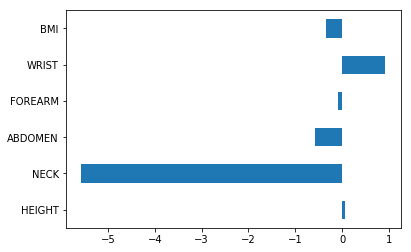

In [123]:
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:7]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

#-중요도는 회귀계수의 절대값 크기
#-허리(WRIST)가 클수록 FAT이 높음

In [125]:
scaler = StandardScaler()
cols = df_raw_X.columns
np_scaled = scaler.fit_transform(df_raw_X)
df_scaled = pd.DataFrame(np_scaled, columns = cols)
df_scaled["FAT"]= df_raw["FAT"]
reg_model_scaled = smf.ols(formula = "FAT ~ HEIGHT + NECK + ABDOMEN + FOREARM + WRIST + BMI", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     110.6
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           7.89e-67
Time:                        20:59:36   Log-Likelihood:                -727.33
No. Observations:                 252   AIC:                             1469.
Df Residuals:                     245   BIC:                             1493.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.277     69.110      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


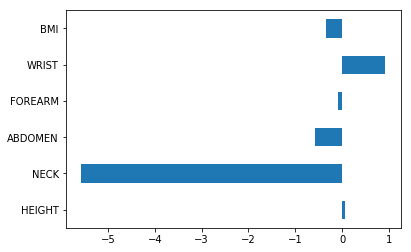

In [127]:
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:7]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

#1.회귀계수의 방향은 동일하며 중요도 크기도 변하지 않음. 허리둘레(WERIST)가 가장 중요하다.
#2 모델의 통계량 변화 없음